In [1]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv('emotion_classify_data.csv', encoding = 'latin1')
# df = df.sample(frac = 1)
df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [9]:
print(len(set(df['Emotion'])))
print(set(df['Emotion']))

3
{'fear', 'anger', 'joy'}


In [11]:
df.groupby('Emotion').Emotion.count()

Emotion
anger    2000
fear     1937
joy      2000
Name: Emotion, dtype: int64

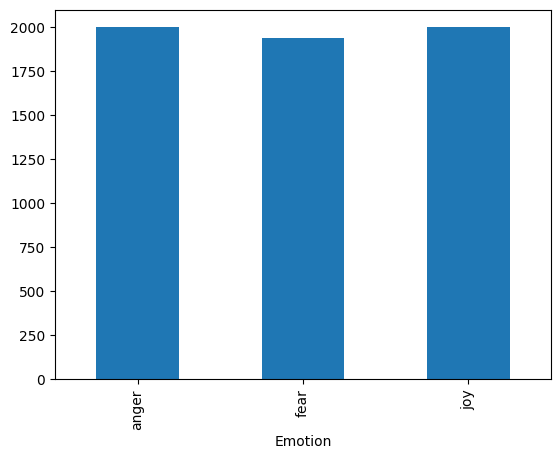

In [12]:
df.groupby('Emotion').Emotion.count().plot.bar()
plt.show()

In [13]:
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
stemmer = PorterStemmer()

In [16]:
df['Comment'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['Comment']]
df['Comment'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), df['Comment']))
df

,Comment,Emotion
0,seriously hate one subject death feel reluctan...,fear
1,im full life feel appalled,anger
2,sit write start dig feelings think afraid acce...,fear
3,ive really angry r feel like idiot trusting fi...,joy
4,feel suspicious one outside like rapture happe...,fear
...,...,...
5932,begun feel distressed,fear
5933,left feeling annoyed angry thinking center stu...,anger
5934,ever get married everything ready offer got to...,joy
5935,feel reluctant applying want able find company...,fear


In [17]:
df.to_csv('cleaned_bbc_data.csv')

In [19]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['Comment']
Y = df['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset


# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression())])


# #Training model
model = pipeline.fit(X_train, y_train)


In [20]:
X_test

105     wanted make sure didnt feel rushed getting cen...
1339                             often feel offended life
2007         feel many petty people judged simply may one
2162    love autumn everything comes although feel get...
62      ive always nervous something like feel like re...
                              ...                        
374     feel impatient stop body giving positive response
4589    cant help looking back child feeling rather je...
1203    hesitate give stars books feel giving stars sa...
3230    didnt think angry im typing away feeling words...
5804    feel like much sure much im overwhelmed unhapp...
Name: Comment, Length: 891, dtype: object

In [22]:
y_test

105     anger
1339    anger
2007    anger
2162      joy
62        joy
        ...  
374     anger
4589    anger
1203      joy
3230    anger
5804      joy
Name: Emotion, Length: 891, dtype: object

In [24]:
from sklearn.metrics import accuracy_score
predict_emotion = model.predict(X_test)
print(accuracy_score(y_test,predict_emotion))

0.9438832772166106


In [26]:
emotion = input("Enter news = ")
emotion_data = {'predict_emotion':[emotion]}
emotion_data_df = pd.DataFrame(emotion_data)
predict_emotion = model.predict(emotion_data_df['predict_emotion'])
print("Predicted emotion = ",predict_emotion[0])

Enter news = i am happy
Predicted emotion =  joy


In [27]:
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(model.predict(X_test),ytest))

              precision    recall  f1-score   support

       anger       0.93      0.95      0.94       283
        fear       0.97      0.90      0.93       274
         joy       0.93      0.98      0.95       334

    accuracy                           0.94       891
   macro avg       0.95      0.94      0.94       891
weighted avg       0.94      0.94      0.94       891

[[268  15   4]
 [  4 247   4]
 [ 11  12 326]]


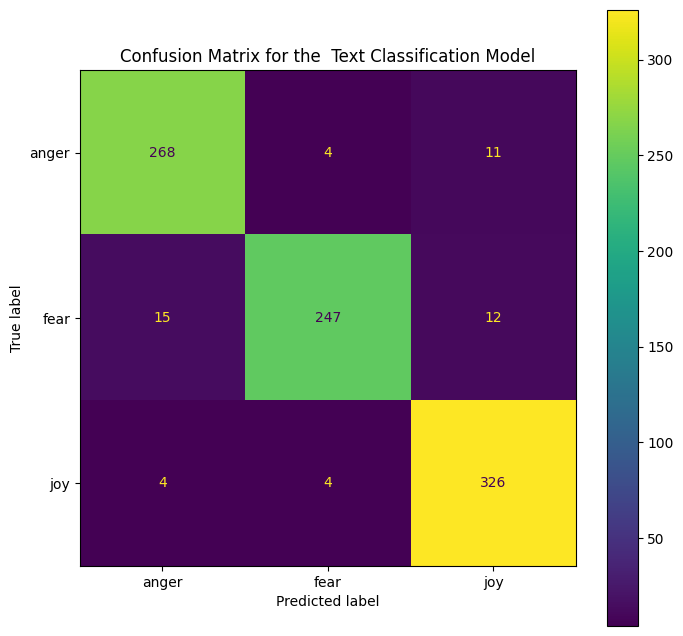

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,model.predict(X_test))
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['anger','fear','joy']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);